# 2. Polynomial Regression
This notebook demonstrates the concept and implementation of Polynomial Regression. We will explore how polynomial features can be used to fit non-linear data using a linear model by transforming the original features.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.pylabtools import figsize
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import PolynomialFeatures
from ipywidgets import interact
from sklearn.pipeline import make_pipeline
%config InlineBackend.figure_format = 'retina'

In [3]:
data = pd.read_csv('/Users/konansul/Downloads/Ice_cream selling data.csv')

In [4]:
data.head()

,Temperature (°C),Ice Cream Sales (units)
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001
3,-3.949661,37.539845
4,-3.578554,32.284531


The first step after importing the dataset is to examine the feature set, the target variable. In this problem, we aim to predict Ice Cream Sales based on the Temperature. The dataset contains a single feature column, that is, the independent variable): `Temperature (°C)` — real-valued and the target is the dependent variable: `Ice Cream Sales (units)` — real-valued
For polynomial regression, we extend the original feature or futures by adding non-linear transformations, such as squares, cubes, or interaction terms. The dataset contains 49 data points and a single original feature - temperature, lets name it $x$. When applying a polynomial transformation of degree 2, we generate additional features like $x^2$. Including the intercept term, the transformed feature matrix becomes:

$$
X =
\begin{bmatrix}
1 & x_1 & x_1^2 \\
1 & x_2 & x_2^2 \\
\vdots & \vdots & \vdots \\
1 & x_{30} & x_{30}^2
\end{bmatrix}
\in \mathbb{R}^{49 \times 3}
$$

The polynomial regression model seeks to fit a hypothesis of the form:

$$
\hat{y} = a_0 + a_1 x + a_2 x^2
$$

More generally, for a polynomial of degree $m$:

$$
\hat{y} = a_0 + a_1 x + a_2 x^2 + \cdots + a_m x^m
$$

The target variable consists of `Ice Cream Sales (units)` values corresponding to each data point. These are also real-valued numerical values. Formally, the target vector is:

$$
y =
\begin{bmatrix}
y_1 \\
y_2 \\
\vdots \\
y_{30}
\end{bmatrix}
\in \mathbb{R}^{49}
$$

Since the target variable is continuous and real-valued, this is a regression task. Specifically, it is a polynomial regression, which generalizes simple linear regression by fitting a non-linear (polynomial) relationship between input and output, while still solving it using linear methods (in terms of the coefficients $a_i$.


In [5]:
data.corr()

,Temperature (°C),Ice Cream Sales (units)
Temperature (°C),1.000000,-0.175184
Ice Cream Sales (units),-0.175184,1.000000


In the scatter plot, you can observe the quadratic relationship between the dependent and the independent variable

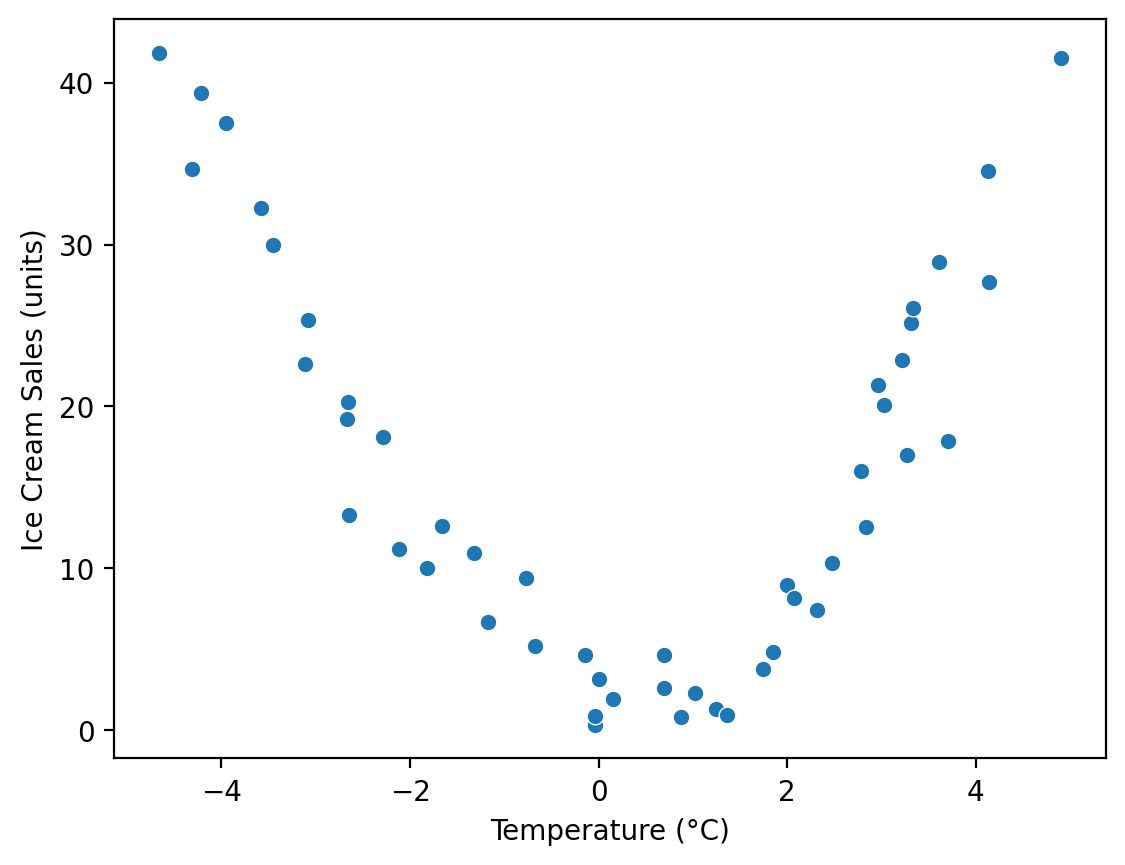

In [6]:
sns.scatterplot(x = 'Temperature (°C)', y = 'Ice Cream Sales (units)', data = data)
plt.show()

In [7]:
x = data['Temperature (°C)']

In [8]:
X = data['Temperature (°C)']

In [9]:
y = data['Ice Cream Sales (units)']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 101)

In [11]:
n = len(X_train)

In [12]:
n

39

Similar procedure that I did for the linear regression can be implemented for the polynomial regression.
The general form of a polynomial regression model of degree $m$ is:

$$
y = a_0 + a_1 x + a_2 x^2 + \cdots + a_m x^m + e
$$

where $a_0, a_1, \dots, a_m$ are the model coefficients, and the $e$ is the residual error. The goal is to find the vector of coefficients $\mathbf{a} = \begin{bmatrix} a_0 & a_1 & \cdots & a_m \end{bmatrix}^\top $ that minimizes the sum of squared residuals:

$$
S_r = \sum_{i=1}^{n} (y_i - a_0 - a_1 x_i - a_2 x_i^2)^2
$$

We compute the partial derivatives of $S_r$ with respect to each coefficient, and set them to zero:
$$
\frac{\partial S_r}{\partial a_0} = -2 \sum_{i=1}^{n} (y_i - a_0 - a_1 x_i - a_2 x_i^2) = 0
$$
$$
\frac{\partial S_r}{\partial a_1} = -2 \sum_{i=1}^{n} (y_i - a_0 - a_1 x_i - a_2 x_i^2) x_i = 0
$$
$$
\frac{\partial S_r}{\partial a_2} = -2 \sum_{i=1}^{n} (y_i - a_0 - a_1 x_i - a_2 x_i^2) x_i^2 = 0
$$

We obtain the system of linear expression that can be expressed as:

$$
\begin{bmatrix}
n & \sum x_i & \sum x_i^2 \\
\sum x_i & \sum x_i^2 & \sum x_i^3 \\
\sum x_i^2 & \sum x_i^3 & \sum x_i^4
\end{bmatrix}
\begin{bmatrix}
a_0 \\
a_1 \\
a_2
\end{bmatrix}
=
\begin{bmatrix}
\sum y_i \\
\sum x_i y_i \\
\sum x_i^2 y_i
\end{bmatrix}
$$

Solving this linear system gives the optimal values of the coefficients $a_0, a_1, a_2$ for the polynomial regression model. As in the linear case, polynomial regression remains a linear model in the parameters, even though the relationship between input $x$ and output $y$ is non-linear.

In [13]:
A = np.array([[n, np.sum(X_train), np.sum(X_train**2)],
              [np.sum(X_train), np.sum(X_train**2), np.sum(X_train**3)],
              [np.sum(X_train**2), np.sum(X_train**3), np.sum(X_train**4)]])

In [14]:
A

array([[  39.        ,    5.96120212,  285.16942873],
       [   5.96120212,  285.16942873,   14.81154279],
       [ 285.16942873,   14.81154279, 3521.08139198]])

In [15]:
b = np.array([np.sum(y_train), np.sum(X_train*y_train), np.sum((X_train**2)*y_train)])

In [16]:
b

array([ 638.69361573, -221.88961439, 7364.24501184])

In [17]:
a0, a1, a2 = np.linalg.solve(A, b)
print("a0 = ", a0)
print("a1 = ", a1)
print("a2 = ", a2)

a0 =  2.9379614895724186
a1 =  -0.935988637515327
a2 =  1.857466760887676


We obtained the coeficients that minimize the sum of squared errors, now lets do this using the scikit-learn library.

In [18]:
polynomial = PolynomialFeatures(degree = 2)

In [19]:
x_train_polynomial = polynomial.fit_transform(np.array(X_train).reshape(-1, 1))

As we can see, the feature matrix consist of $1, x$ and $x^2$.

In [20]:
x_train_polynomial[:10]

array([[ 1.        ,  3.61077848, 13.03772121],
       [ 1.        , -3.08130332,  9.49443018],
       [ 1.        ,  3.27004407, 10.69318821],
       [ 1.        , -3.94966109, 15.59982272],
       [ 1.        ,  3.02087431,  9.12568162],
       [ 1.        , -1.66034773,  2.75675458],
       [ 1.        ,  0.69359887,  0.4810794 ],
       [ 1.        , -1.32637898,  1.75928121],
       [ 1.        ,  0.68878091,  0.47441914],
       [ 1.        ,  3.31607252, 10.99633695]])

In [21]:
model = LinearRegression()

In [22]:
y_test

36    15.996620
22     3.165600
20     0.328626
38    21.342916
18     5.210163
1     34.661120
45    17.843957
21     0.897603
16     6.689123
46    34.530743
Name: Ice Cream Sales (units), dtype: float64

In [23]:
model.fit(x_train_polynomial, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [24]:
model.coef_, model.intercept_

(array([ 0.        , -0.93598864,  1.85746676]), np.float64(2.937961489572423))

We obtained the same coefficients as those found by manual calculation, confirming the correctness of our implementation. Next, we transform the test dataset using the same polynomial feature transformation as the training data. Finally, we apply the trained model to the transformed test data to make predictions.

In [25]:
X_test_poly = polynomial.transform(np.array(X_test).reshape(-1, 1))

In [26]:
y_pred = model.predict(X_test_poly)

In [27]:
y_pred

array([14.73662441,  2.93004241,  2.97423181, 16.44113273,  4.41177019,
       41.58780599, 24.95552687,  2.97182112,  6.59227111, 30.76745906])

In [28]:
errors = y_pred - y_test

In [29]:
errors

36   -1.259996
22   -0.235558
20    2.645606
38   -4.901783
18   -0.798392
1     6.926686
45    7.111570
21    2.074218
16   -0.096852
46   -3.763284
Name: Ice Cream Sales (units), dtype: float64

In [30]:
MAPE = mean_absolute_percentage_error(y_test, y_pred)

In [31]:
print(f"MAPE: {MAPE:.5f}%")

MAPE: 1.16193%


In [32]:
MAE = mean_absolute_error(y_test, y_pred)
MAE

2.981394484017724

In [33]:
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))

In [34]:
RMSE

np.float64(3.877301876123977)

Now, let's visualize the results to confirm the correctness of our calculations. Of course, the numerical values of the coefficients and predictions is very essential, but plotting the regression curve against the data points helps us better understand how well the model fits the data.

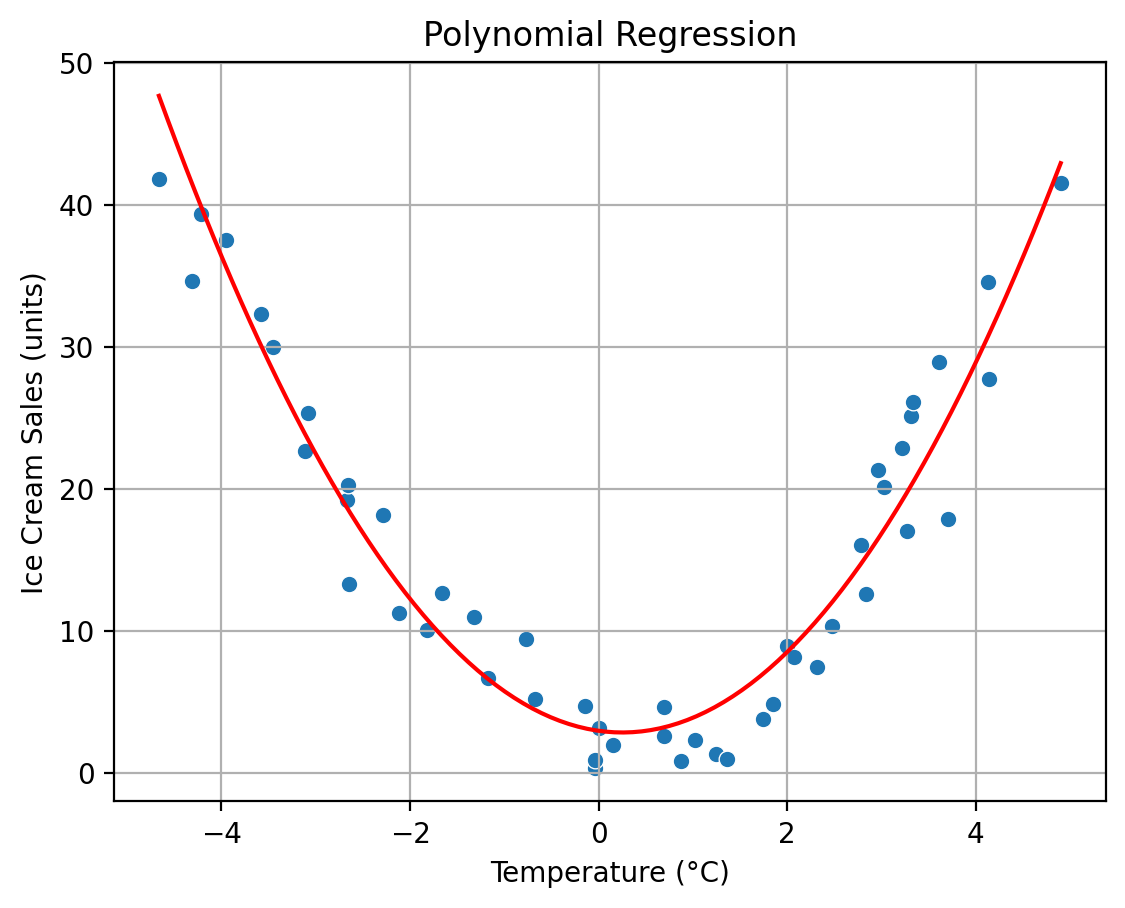

In [35]:
sns.scatterplot(x = 'Temperature (°C)', y = 'Ice Cream Sales (units)', data=data)
x_line = np.linspace(data['Temperature (°C)'].min(), data['Temperature (°C)'].max(), 100)
y_line = a0 + a1 * x_line + a2 * x_line ** 2
plt.plot(x_line, y_line, color = 'red')
plt.title('Polynomial Regression')
plt.grid(True)
plt.show()

No we can plot the line and the test points. Don’t be mistaken by the shape even though this is polynomial regression, the curve is still a “line” in terms of the model being linear in parameters. Because of the polynomial features, the regression curve is curved, not straight, but it is still a linear model fitted on transformed features. Additionally, we will plot our test data points on the same graph to see how well the model predicts unseen data visually.

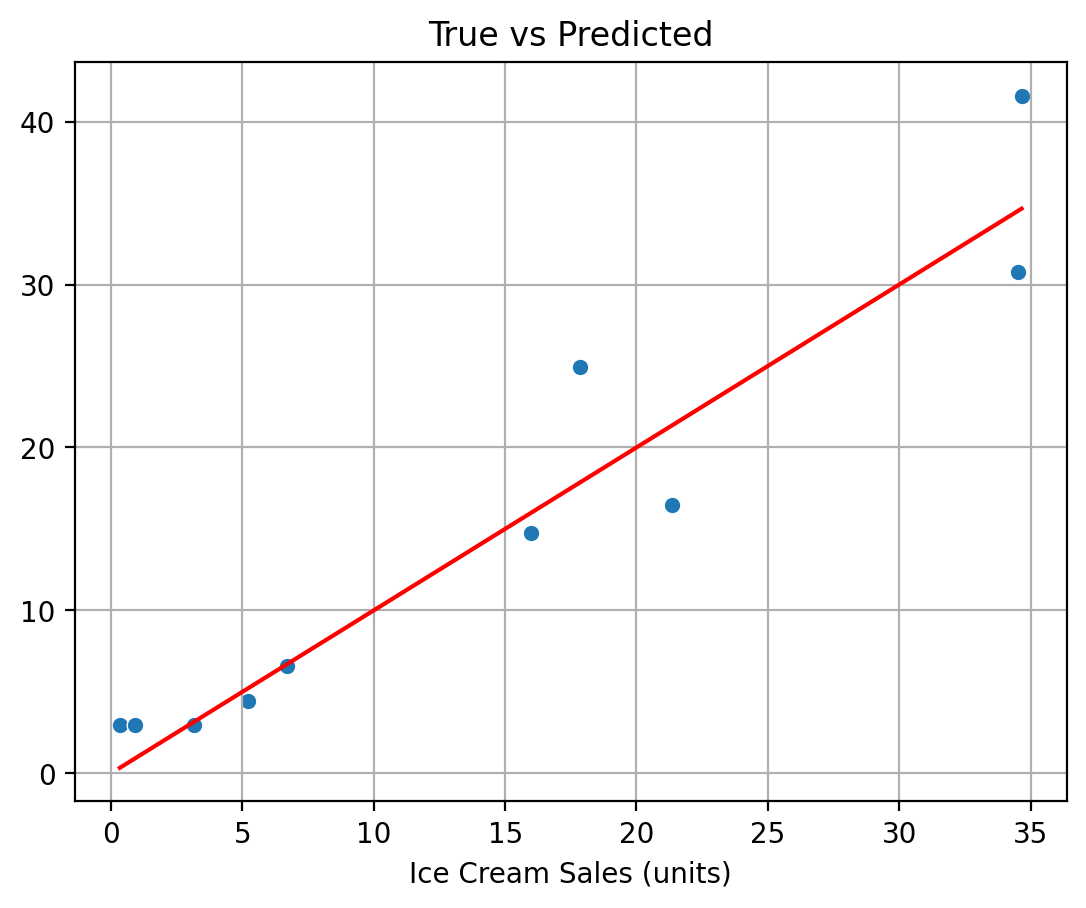

In [36]:
sns.scatterplot(x = y_test, y = y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.title("True vs Predicted")
plt.grid(1)
plt.show()

In [37]:
errors

36   -1.259996
22   -0.235558
20    2.645606
38   -4.901783
18   -0.798392
1     6.926686
45    7.111570
21    2.074218
16   -0.096852
46   -3.763284
Name: Ice Cream Sales (units), dtype: float64

As we can see, the error for some points is quite large. For example, the error for point 45 is significantly high. To understand why, let's examine the plot below, which shows the test points, their predicted values, and their indices. From the visualization, you can observe that some points, such as 1 and 45, are located far from their actual values, resulting in large errors, but points like 22, 18, 36, and 21 lie very close to the regression curve, which explains their almost zero errors. This plot helps us understand the distribution of errors and identify outliers or points where the model may be underperforming. To handle such points we cam fit the polynomial of degree three, four, five and etc. However, using a polynomial of too high a degree can lead to overfitting, that is capturing noise, outliers.  

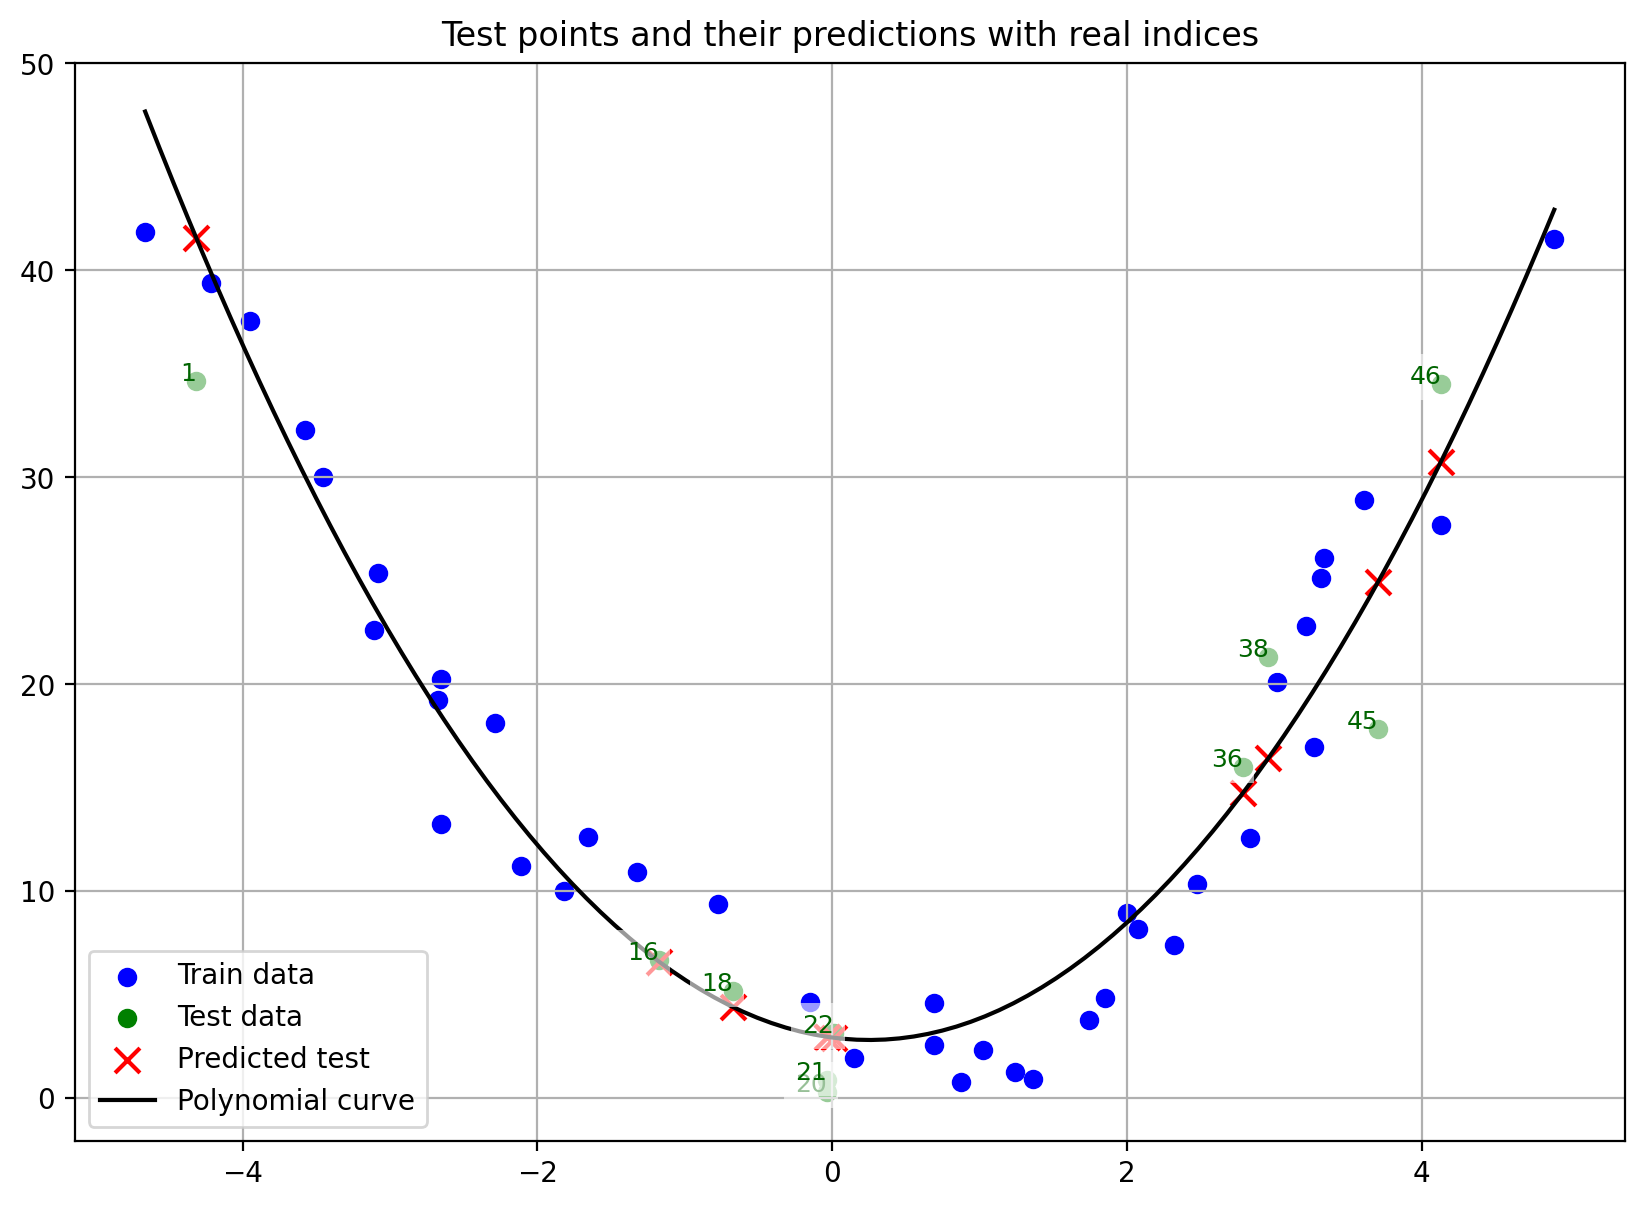

In [38]:
plt.figure(figsize = (10, 7))
plt.scatter(X_train, y_train, color = 'blue', label = 'Train data')
plt.scatter(X_test, y_test, color = 'green', label = 'Test data')
plt.scatter(X_test, y_pred, color = 'red', marker = 'x', s = 80, label = 'Predicted test')

x_line = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
x_line_poly = polynomial.transform(x_line)
y_line = model.predict(x_line_poly)
plt.plot(x_line, y_line, color = 'black', label = 'Polynomial curve')

for idx, (x, y_true) in zip(y_test.index, zip(X_test, y_test)):
    plt.text(x, y_true, str(idx), fontsize=9, color = 'darkgreen', ha ='right',
             bbox = dict(facecolor = 'white', alpha = 0.6, edgecolor = 'none'))
    
plt.title("Test points and their predictions with real indices")
plt.grid(1)
plt.legend()
plt.show()

The graph below is a dynamic visualization that shows how the polynomial regression curve changes as we increase the degree from 1 to 30.

For degrees 2–8, the model is good
Around degrees 11–12, the model becomes highly flexible and starts overfitting, it captures not only the general trend but also the noise in the training data.
After degree 20, the curve becomes extremely unstable, clearly illustrating overfitting and poor generalization.

In [40]:
def plot_poly(degree):
    plt.figure(figsize = (10, 7))
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train.values.reshape(-1, 1), y_train.values)
    
    x_line = np.linspace(X_train.min(), X_train.max(), 100).reshape(-1, 1)
    y_line = model.predict(x_line)

    plt.scatter(X_train, y_train, label = 'Train data')
    plt.plot(x_line, y_line, color = 'red', label = f'Polynomial degree {degree}')
    plt.legend()
    plt.title("Polynomial regression degree visualization")
    plt.grid(1)
    plt.show()

interact(plot_poly, degree=(1, 30))

interactive(children=(IntSlider(value=15, description='degree', max=30, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_poly(degree)>

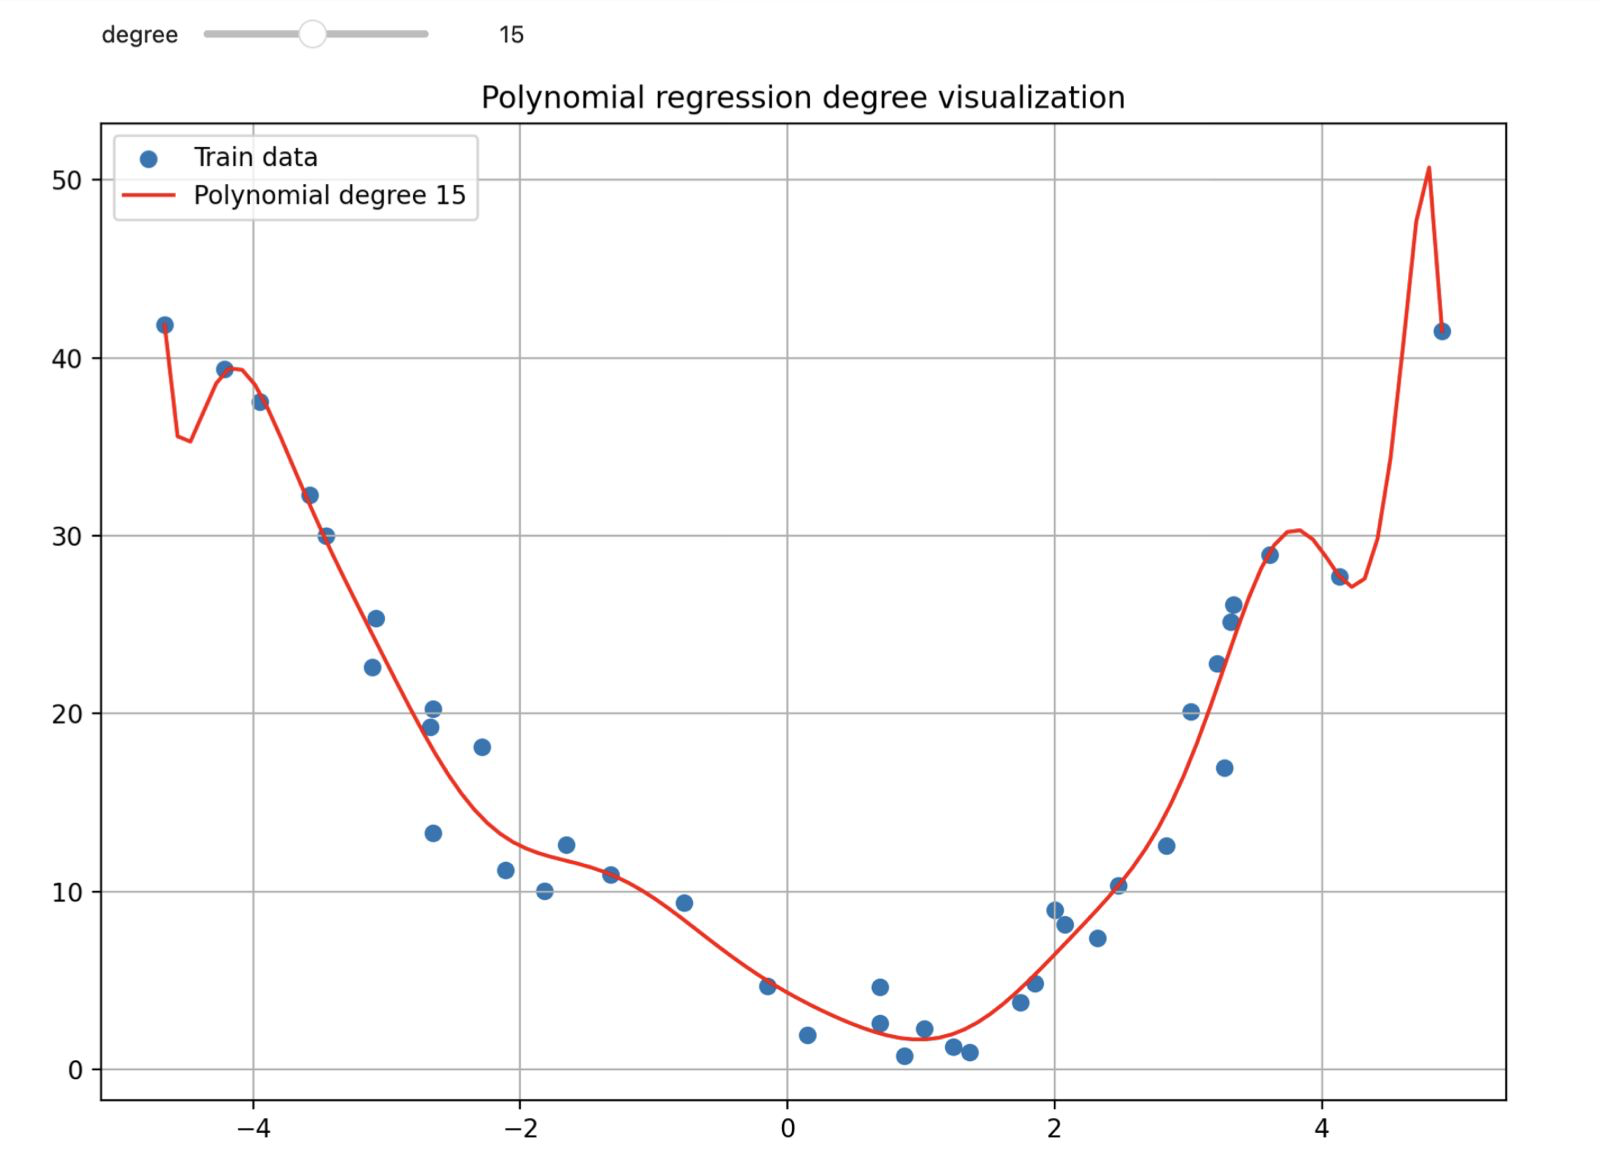

# References
[1] Numerical Methods for Engineers, Seventh Edition Steven C. Chapra, Raymond P. Canale

[2] https://www.kaggle.com/datasets/mirajdeepbhandari/polynomial-regression/data